In [1]:
from skimage import feature, transform, measure,filters
from skimage.io import imread
from skimage.color import gray2rgb, rgb2gray
from skimage.filters import threshold_otsu, frangi
from skimage.segmentation import felzenszwalb


import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
# pip install imutils
# pip install opencv-python
import imutils
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

from multiprocessing import Pool



In [89]:
def get_dumb_features(img):
    
    ratios = []
    correlations = []
    max_norm = []
    mean_std = []
        
    a = img[:,:,0]
    b = img[:,:,1]
    c = img[:,:,2]    
        
    for ii,jj in combinations([a,b,c],2):
        ratios.append(np.mean(ii)/np.mean(jj))
        corr = np.corrcoef(np.ndarray.flatten(ii),np.ndarray.flatten(jj))[0,1]
        correlations.append(corr)
    for ii in [a,b,c]:
        max_norm.append(np.max(ii)/np.mean(ii))    
        mean_std.append(np.mean(ii)/np.std(ii)) 
    maxes = np.array([np.sum(a),np.sum(b),np.sum(c)])
    dominant_color = np.argmax(maxes)    

    
    return np.asarray(ratios + correlations + max_norm + mean_std +dominant_color)

def get_smart_features(img):
    img_grey = rgb2gray(img)
    img_grey_rz = transform.resize(img_grey,(240,200))
    img_grey_rz = img_grey
    thresh = threshold_otsu(img_grey_rz)
    binary_img = img_grey_rz > thresh
    
    
    edginess = np.sum(feature.canny(img_grey_rz,sigma=3))
    corners = feature.corner_harris(img_grey_rz).size
    shape = np.mean(feature.shape_index(img_grey_rz))
    blobbiness = (feature.blob_dog(img_grey_rz)).shape[0]
    perimeter = measure.perimeter(binary_img)
    peaks = (feature.peak_local_max(img_grey_rz)).size
    
    smart_features = [edginess,corners,shape,blobbiness,perimeter,peaks]
    
    for ii,jj in combinations(smart_features,2):
        try:
            smart_features.append(ii/jj)
        except:
            smart_features.append(0)
        
    return np.asarray(smart_features)



def get_features(path,file,lgc_return_label = True):
    if lgc_return_label:
        label = file.split("_")[0]
    else:
        label = 'unknown'

    filename = path+file
    img = imread(filename)

    if len(img.shape) != 3:
        img = gray2rgb(img)
    
        
    dumb_features = get_dumb_features(img)
    smart_features = get_smart_features(img)
    
    smart_features[np.isnan(smart_features)] = 10000.0
    smart_features[np.isinf(smart_features)] = 0.0
    
    
    good_features = np.concatenate((dumb_features , smart_features))

    
    return good_features, label

In [90]:
#path = '/Users/cwfink/Documents/School/UC_Berkeley/Classes/Spring_2018/AY250/HW/Fink_ay250_homework/hw_6/50_categories/'
path = '50_categories/'
X = [] 
Y = []

num_process = 4
pool = Pool(processes=num_process)


for subdir, dirs, files in os.walk(path):
    print('On directory: {}'.format(subdir))
    for file in files:
        if '.DS_Store' not in file:
            #features = pool.map(extractImageFeatures,filesInFolder)
            x, y = get_features(subdir+'/',file,lgc_return_label = True)
            X.append(x)
            Y.append(y)




On directory: 50_categories/
On directory: 50_categories/gorilla


/Users/cwfink/anaconda3/envs/bootcamp-env/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/cwfink/anaconda3/envs/bootcamp-env/lib/python3.6/site-packages/skimage/feature/corner.py:373: RuntimeWarning: invalid value encountered in true_divide
  return (2.0 / np.pi) * np.arctan((l2 + l1) / (l2 - l1))
/Users/cwfink/anaconda3/envs/bootcamp-env/lib/python3.6/site-packages/skimage/feature/corner.py:373: RuntimeWarning: divide by zero encountered in true_divide
  return (2.0 / np.pi) * np.arctan((l2 + l1) / (l2 - l1))
/Users/cwfink/anaconda3/envs/bootcamp-env/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in long_scalars
/Users/cwfink/anaconda3/envs/bootcamp-env/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in double_

On directory: 50_categories/raccoon
On directory: 50_categories/crab
On directory: 50_categories/blimp
On directory: 50_categories/snail
On directory: 50_categories/airplanes
On directory: 50_categories/dog
On directory: 50_categories/dolphin
On directory: 50_categories/goldfish
On directory: 50_categories/giraffe
On directory: 50_categories/bear
On directory: 50_categories/killer-whale


/Users/cwfink/anaconda3/envs/bootcamp-env/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in long_scalars


On directory: 50_categories/penguin
On directory: 50_categories/zebra
On directory: 50_categories/duck
On directory: 50_categories/conch
On directory: 50_categories/camel
On directory: 50_categories/owl
On directory: 50_categories/helicopter
On directory: 50_categories/starfish
On directory: 50_categories/saturn
On directory: 50_categories/galaxy
On directory: 50_categories/goat
On directory: 50_categories/iguana
On directory: 50_categories/elk
On directory: 50_categories/hummingbird
On directory: 50_categories/triceratops
On directory: 50_categories/porcupine
On directory: 50_categories/teddy-bear
On directory: 50_categories/comet
On directory: 50_categories/hot-air-balloon
On directory: 50_categories/leopards
On directory: 50_categories/toad
On directory: 50_categories/mussels
On directory: 50_categories/kangaroo
On directory: 50_categories/speed-boat
On directory: 50_categories/bat
On directory: 50_categories/swan
On directory: 50_categories/octopus
On directory: 50_categories/frog


In [ ]:
np.sum(np.isnan(X))

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify = Y, random_state=42)


In [92]:
# fit and scale training data
X_scale = StandardScaler()
X_train = X_scale.fit_transform(X_train)

# use scaling from training data to transform testing data
X_test = X_scale.transform(X_test)

In [93]:
#baseline 
dummy_clf = DummyClassifier(strategy='prior')
dummy_clf.fit(X_train, Y_train)
dummy_clf.score(X_test, Y_test)

0.12603062426383982

In [94]:
clf_rand_forest = RandomForestClassifier(n_estimators=50)
clf_rand_forest = RandomForestClassifier(class_weight='balanced',n_jobs=-1, random_state=42)
clf_rand_forest.fit(X_train, Y_train)
clf_rand_forest.score(X_test, Y_test)

0.25088339222614842

In [66]:
clf_rand_forest.feature_importances_

array([ 0.04175646,  0.0358299 ,  0.03777964,  0.03880494,  0.04179034,
        0.03671171,  0.0369754 ,  0.0376155 ,  0.03604739,  0.03684081,
        0.0337403 ,  0.03586921,  0.03498442,  0.        ,  0.02903429,
        0.00789128,  0.03503109,  0.03792694,  0.03259765,  0.02638856,
        0.01876609,  0.03439376,  0.03077475,  0.03234274,  0.00608471,
        0.03831464,  0.0352165 ,  0.01730815,  0.02998319,  0.0291942 ,
        0.01977557,  0.02096044,  0.03326942])

2162519


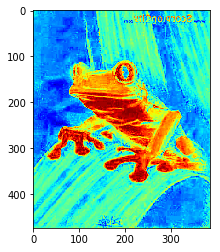

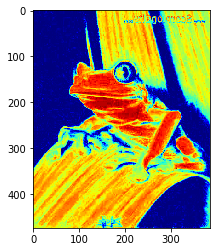

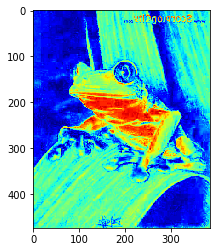

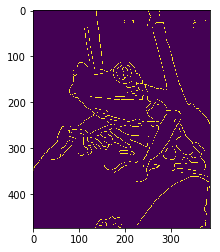

In [29]:
path = '50_categories/'
img = imread(path+'/frog/frog_0002.jpg')
plt.figure()
plt.imshow(img[:,:,0],cmap = 'jet')
plt.figure()
plt.imshow(img[:,:,1],cmap = 'jet')
plt.figure()
plt.imshow(img[:,:,2],cmap = 'jet')
plt.figure()
plt.imshow(img,cmap = 'jet')
img_grey = rgb2gray(img)
    
canny =    feature.canny(img_grey,sigma=3)
plt.imshow(canny)
np.mean(canny)
peaks = feature.peak_local_max(img)
#plt.imshow(peaks)
print(np.sum(peaks))


In [80]:
shape = feature.shape_index(img_grey,sigma = .1)

/Users/cwfink/anaconda3/envs/bootcamp-env/lib/python3.6/site-packages/skimage/feature/corner.py:373: RuntimeWarning: divide by zero encountered in true_divide
  return (2.0 / np.pi) * np.arctan((l2 + l1) / (l2 - l1))
/Users/cwfink/anaconda3/envs/bootcamp-env/lib/python3.6/site-packages/skimage/feature/corner.py:373: RuntimeWarning: invalid value encountered in true_divide
  return (2.0 / np.pi) * np.arctan((l2 + l1) / (l2 - l1))


In [27]:
img_grey.shape[0]/img_grey.shape[1]
#blob = feature.blob_dog(img_grey)
#blob.shape[0]


1.2311688311688311

338.214249456


/Users/cwfink/anaconda3/envs/bootcamp-env/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


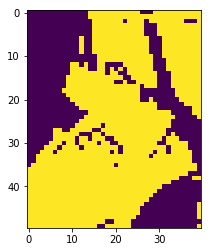

In [21]:
img_grey = transform.resize(img_grey,(50,40))
thresh = threshold_otsu(img_grey)
binary = img_grey > thresh
d = measure.perimeter(binary)
plt.imshow(binary)
print(d)

In [58]:
img_grey = img_grey/img_grey.size

In [19]:
img_grey.shape


(474, 385)

In [53]:
a=[2,3,4,np.NaN,5]

In [41]:
np.isnan(a)

array([False, False, False,  True, False], dtype=bool)

In [51]:
b = [2,3,4]

In [54]:
c = np.concatenate((a,b))

In [55]:
c

array([  2.,   3.,   4.,  nan,   5.,   2.,   3.,   4.])